# Start the Project

Import all necessary libraries.

In [231]:
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Now as we imported the necessary libraries let’s import the dataset in the form of csv file using pandas library.

In [232]:
data = pd.read_csv("Breast_cancer.csv")

Check for the missing data and preprocess it, we will also look at the data axes and attributes.

In [233]:
# Preprocess the data
data.replace('?',-99999, inplace=True)
print(data.axes)

print(data.columns)

[RangeIndex(start=0, stop=699, step=1), Index(['ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')]
Index(['ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In this step we will randomly select one row and visualize its data, we will also look for the shape of data, means total number of instances and attributes. The highlighted output is the shape of dataset.

In [234]:
#visualize and explore the data
print(data.loc[20])

# Print the shape of the dataset
print(data.shape)

ID                             1054590
Clump Thickness                      7
Uniformity of Cell Size              3
Uniformity of Cell Shape             2
Marginal Adhesion                   10
Single Epithelial Cell Size          5
Bare Nuclei                         10
Bland Chromatin                      5
Normal Nucleoli                      4
Mitoses                              4
Class                                4
Name: 20, dtype: object
(699, 11)


Now we will describe our data, it means we will look at the statistics value for each attribute. The (describe) function of pandas lib Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [235]:
#describing the data
print(data.describe())

                 ID  Clump Thickness  Uniformity of Cell Size  \
count  6.990000e+02       699.000000               699.000000   
mean   1.071704e+06         4.417740                 3.134478   
std    6.170957e+05         2.815741                 3.051459   
min    6.163400e+04         1.000000                 1.000000   
25%    8.706885e+05         2.000000                 1.000000   
50%    1.171710e+06         4.000000                 1.000000   
75%    1.238298e+06         6.000000                 5.000000   
max    1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                699.000000         699.000000   
mean                   3.207439           2.806867   
std                    2.971913           2.855379   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000           1.000000   
75%                    5.000000     

Now we will do graphical representation of our dataset, in which we will use (histogram) feature to visualize graph of each attribute. A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the Data Frame, resulting in one histogram per column.

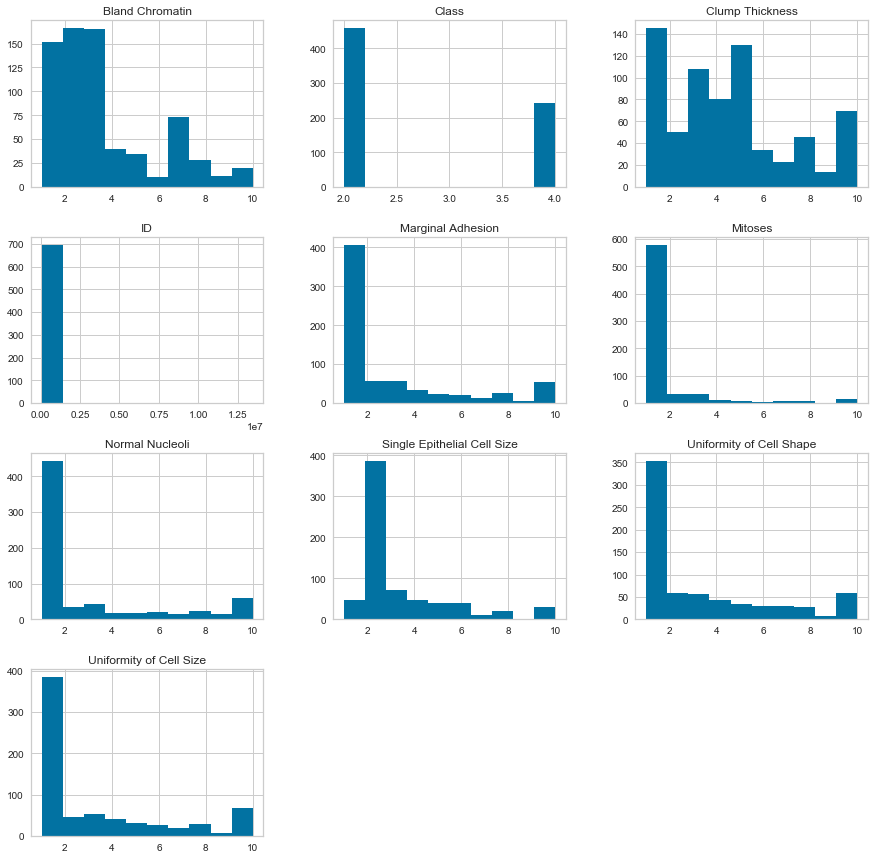

In [236]:
#Plotting the data
data.hist(figsize=(15,15))
plt.show()

We will plot the scatter matrix for our dataset, which is broadly used for the understanding correlation between attributes. A scatter plot matrix can be formed for a collection of variables where each of the variables will be plotted against each other.

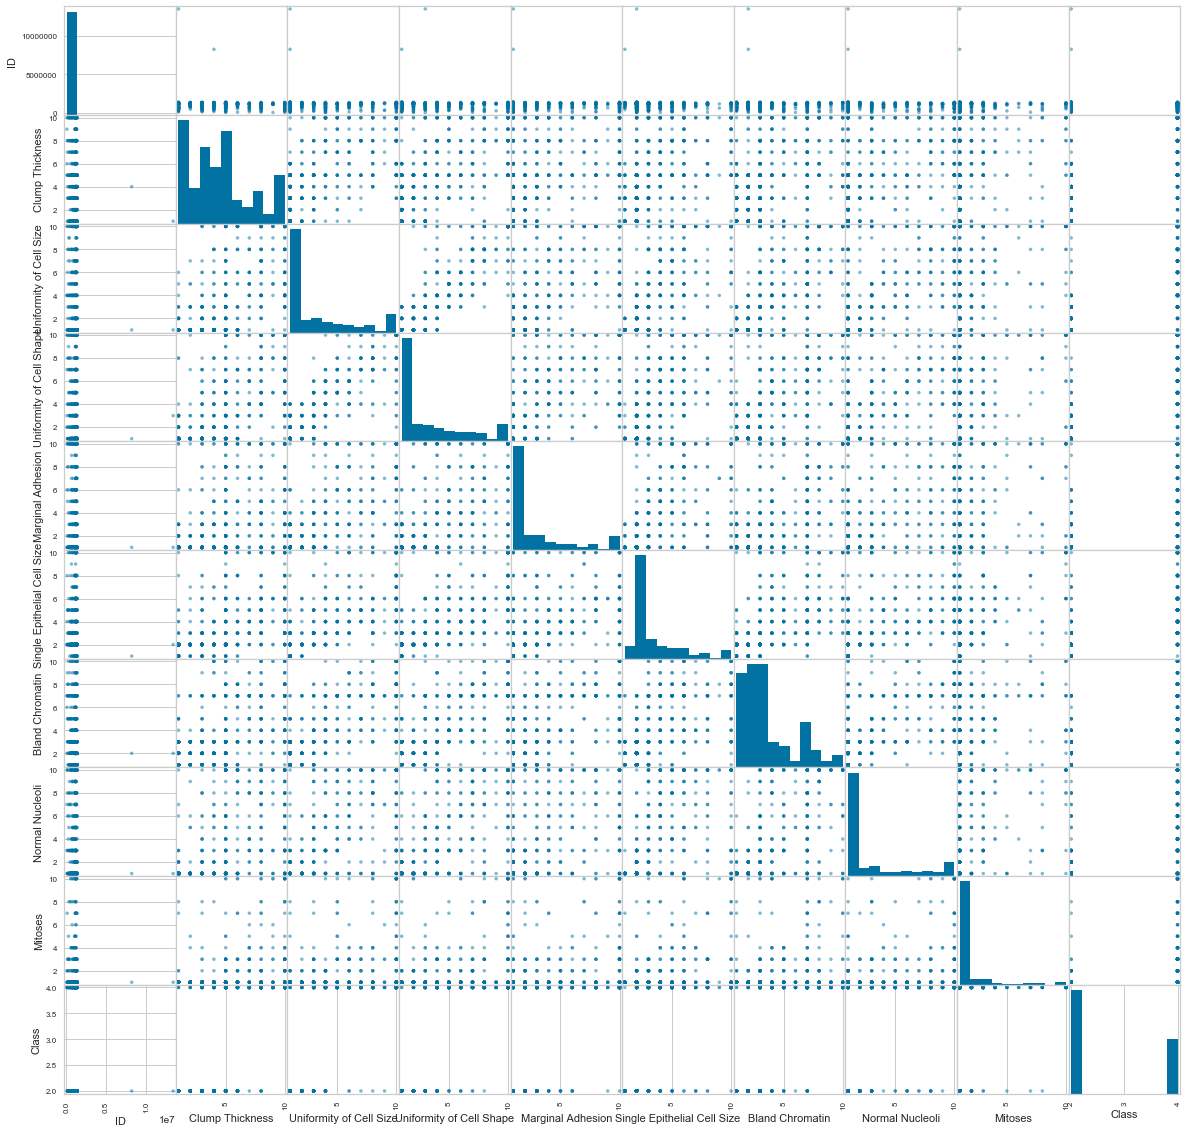

In [237]:
#scattering the plot
scatter_matrix(data, figsize=(20,20))
plt.show()

In this step we will plot the correlation matrix to see the correlation between attributes. This also help us in determining that which attributes have high correlation and then we can decide which attribute is important for us. In Python the correlation values lie between (-1 and 1).
There are two key components of a correlation value:
1.	magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation.
2.	sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.


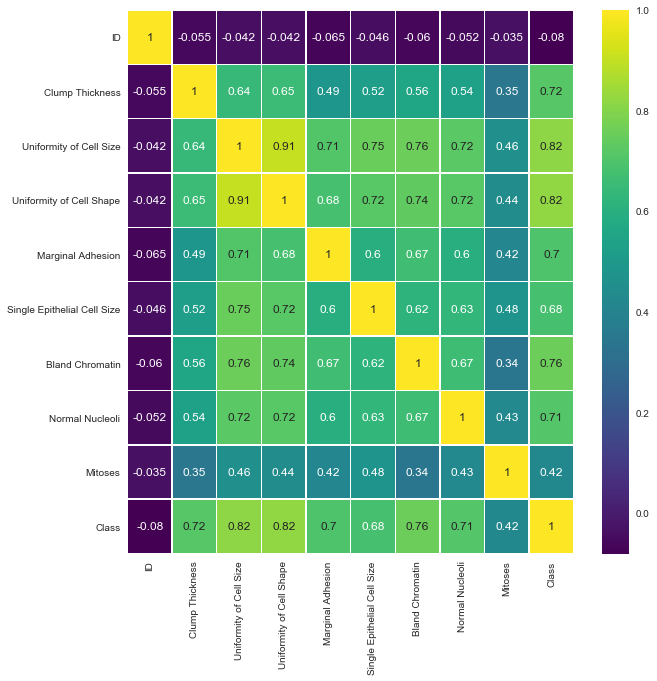

In [238]:
# Correlation matrix
corrmat = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,cmap='viridis',annot=True,linewidths=0.5,)

In this step, we will convert the columns in a list and then divide our data into two variables (X and y), where X is consisting of all attributes except (class and ID). In y variable we will put target value which is our “class” attribute and then look for the shape of both variables.

In [239]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class", "ID"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
y = data[target]

# Print shapes
print(X.shape)
print(y.shape)

(699, 9)
(699,)


Now look at the any random row of X and y to check we are going well.

In [240]:
print(X.loc[20])
print(y.loc[20])

Clump Thickness                 7
Uniformity of Cell Size         3
Uniformity of Cell Shape        2
Marginal Adhesion              10
Single Epithelial Cell Size     5
Bare Nuclei                    10
Bland Chromatin                 5
Normal Nucleoli                 4
Mitoses                         4
Name: 20, dtype: object
4


This step is very important as we will spit our data into the training and testing to check the accuracy and for this we will use (model selection) library. When you’re working on a model and want to train it, you obviously have a dataset. But after training, we have to test the model on some test dataset. To do this we will split the dataset into two sets, one for training and the other for testing; and you do this before you start training your model.

In [241]:
#Creating X and y datasets for training
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2)

In [242]:
#Specify the testing option
seed= 5
scoring = 'accuracy'

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(559, 9) (140, 9)
(559,) (140,)


Sometimes we get the future warning in our code, so to ignore them we will use below command.

In [243]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


This is the most important step of our code, where we will import our both algorithms (SVM and Random Forest) and then we will train model and test it using 10-fold cross validation. 

In [244]:
from sklearn.ensemble import RandomForestClassifier
#Define models to train
models = []
#models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC(gamma = 'auto')))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(max_depth=10, n_estimators = 40)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[0.94642857 0.94642857 0.94642857 0.98214286 0.91071429 0.92857143
 0.94642857 0.98214286 0.94642857 0.96363636]
SVM: 0.949935 (0.020781)
[0.94642857 0.96428571 0.96428571 0.96428571 0.96428571 0.94642857
 0.96428571 0.98214286 0.92857143 0.98181818]
RFC: 0.960682 (0.015523)


Now we will plot an algorithm comparison box plot to compare the accuracy of both algorithms and as we can see the accuracy calculated by Random Forest is more than accuracy of SVM. It means RF is more accurate than SVM.

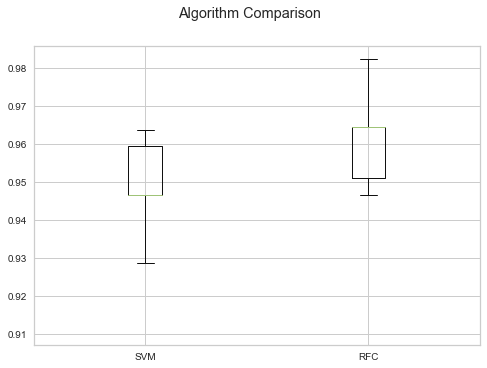

In [245]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Let’s visualize the result of all 10 folds graphically and look at the mean of all the score.

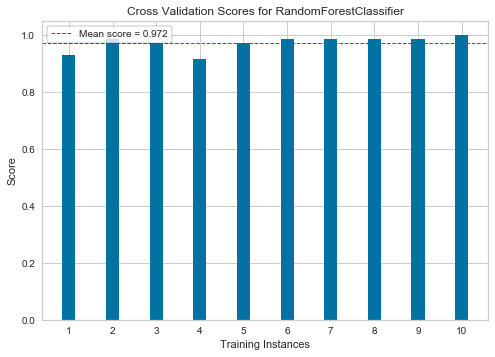

In [246]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

_, ax = plt.subplots()

cv = StratifiedKFold(10)

oz = CVScores(RandomForestClassifier(max_depth=5, n_estimators = 40), ax=ax, cv=cv, scoring= 'accuracy')
oz.fit(X,y)
oz.poof()

Now we will make predictions on validation sheet, we will look at the accuracy score and classification report which is consisting of many important parameters.

In [247]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    

SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        86
           4       0.95      0.96      0.95        54

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

RFC
0.95
              precision    recall  f1-score   support

           2       0.94      0.98      0.96        86
           4       0.96      0.91      0.93        54

   micro avg       0.95      0.95      0.95       140
   macro avg       0.95      0.94      0.95       140
weighted avg       0.95      0.95      0.95       140



Now we will look at the confusion matrix to evaluate the accuracy of a classification.

=== Confusion Matrix ===
[[84  2]
 [ 5 49]]




Text(0.5,29.5,'Predicted label')

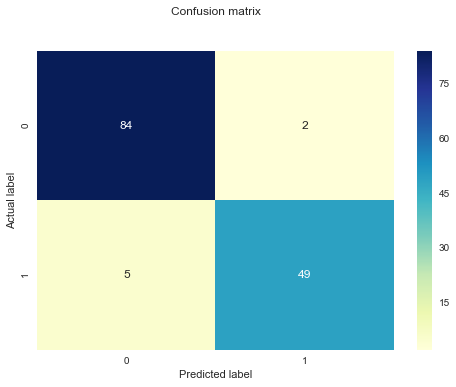

In [248]:
from sklearn.metrics import  confusion_matrix
predict = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predict))
print('\n')

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In this step we will calculate the Cohen Kappa score and Matthews Correlation Coefficient (MCC).

In [249]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, predictions)
print("Kappa Score: ", cohen_score)

from sklearn.metrics import matthews_corrcoef

MCC = matthews_corrcoef(y_test, predictions)

print("MCC Score: ", MCC)


Kappa Score:  0.8933855526544822
MCC Score:  0.8943195984162666


2.	Visualize a decision tree from the Random Forest trees using Python export_graphviz.

In [250]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators = 50)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)



In [251]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '2'] = 'no cancer'
y_train_str[y_train_str == '4'] = 'cancer'
y_train_str = y_train_str.values

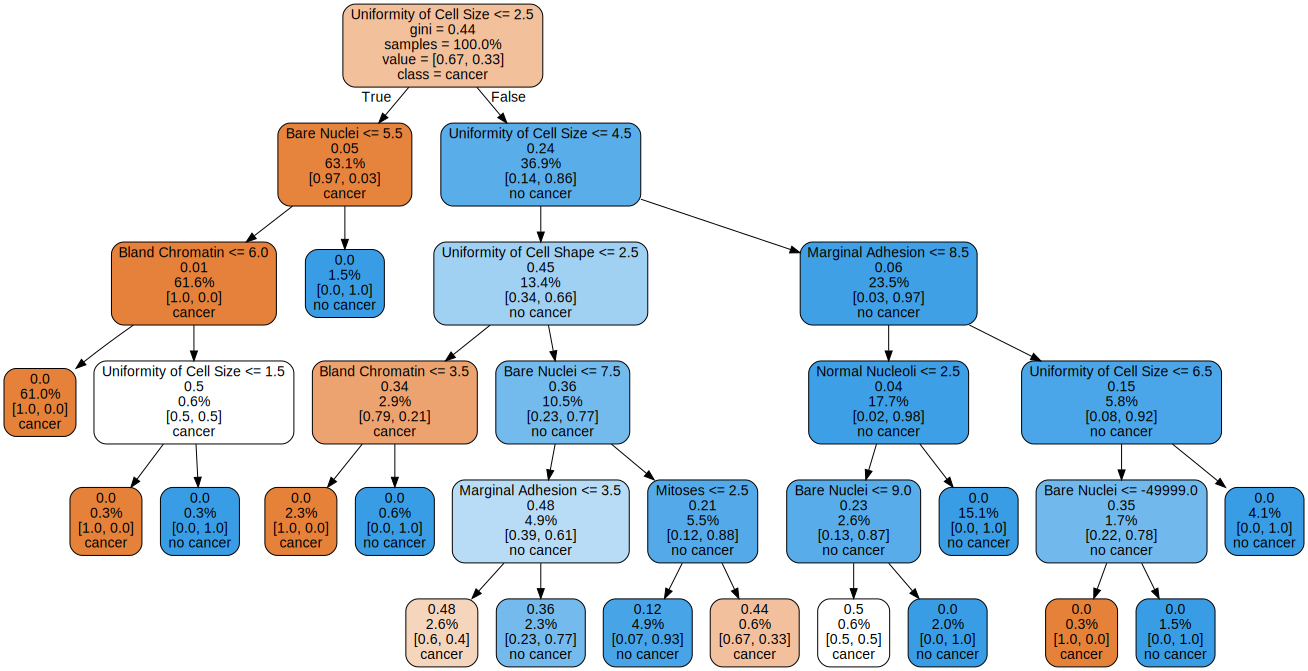

In [252]:
from sklearn.tree import export_graphviz #plot tree
import graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

